In [1]:
from __future__ import division
%matplotlib nbagg
import os, sys
import numpy as np
import pandas as pd
from collections import defaultdict
from src.python_latexify import latexify, format_axes
latexify()

import matplotlib
matplotlib.rcParams.update(latexify())
import matplotlib.pyplot as plt

#font = {'family' : 'normal',
#        'weight' : 'bold',
#        'size'   : 14}
#matplotlib.rc('font', **font)


In [2]:
from src.censorship_ratios import *

DATA = "data/"
PLOTS = "results/measurement/plots/"
TABLES = "results/measurement/tables/"
if not os.path.exists(PLOTS):
    os.makedirs(PLOTS)
if not os.path.exists(TABLES):
    os.makedirs(TABLES)

In [3]:
def getCDF(data):
    xdata = np.sort(data)
    ydata = [i/len(xdata) for i in range(len(xdata))]
    return xdata, ydata

## sIP_subcats

In [4]:
df_sIP_subcat_orig = pd.read_csv("utils/Servers_IMC-original.txt")
df_sIP_subcat_orig['subcat'] = df_sIP_subcat_orig['subcat'].apply(
    lambda x: x.replace('kids_and_teens', 'teens'))
df_sIP_subcat_calibrated = pd.read_csv("utils/Servers_IMC-calibrated.txt")
df_sIP_subcat_disjoint = pd.read_csv("utils/Servers_IMC-disjoint.txt")

In [5]:
print len(df_sIP_subcat_orig),  len(df_sIP_subcat_calibrated),  len(df_sIP_subcat_disjoint)

580 351 540


# MAIN RESULTS

In [6]:
df_all1 = pd.read_pickle(DATA + "case_detected_all_20150423.pkl")
df_all2 = pd.read_pickle(DATA + "case_detected_all_20150427.pkl")
df_all = pd.concat([df_all1,df_all2])
print len(df_all1), len(df_all2), len(df_all)

250593 146328 396921


In [7]:
del df_all1, df_all2

df_final = df_all[df_all['sIP'].isin(df_sIP_subcat_calibrated['sIP'])]
print len(df_final)

274102


# TORDIR: case1 vs case3 (proof of consistency and country blockage)

In [8]:
df_tor = df_final[ df_final['domain']=='torDir' ]
tor_ratios = get_ratios( df_tor.groupby(['country','case'])['port'].count().unstack().fillna(0) )
tor_ratios.head()

case,0,1,2,3,4,tot,err,case1,case2,case3
country,,,,,,,,,,
AE,0,2,17,0,1,19,1,0.105263,0.894737,0
AF,2,2,25,0,0,27,2,0.074074,0.925926,0
AL,0,1,8,0,2,9,2,0.111111,0.888889,0
AM,0,0,15,0,0,15,0,0.000000,1.000000,0
AO,0,0,28,0,0,28,0,0.000000,1.000000,0


In [177]:
def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

def annotate_this(ax1, label, x, y):

    if label in ['CN', 'LR']:
        ax1.annotate(label, xy = (ix-.01, iy-.01))
    elif label in ['NZ', 'MD']:
        ax1.annotate(
            label, 
            xy = (ix, iy), xytext = (20,20),
            textcoords = 'offset points', ha = 'right', va = 'bottom',
        #    bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'),
            )
    elif label in ['UY']:
        # UY
        ax1.annotate(
            label, 
            xy = (ix, iy), xytext = (10, 20),
            textcoords = 'offset points', ha = 'right', va = 'bottom',
        #    bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'),
            )
    elif label in ['US']:
        # US
        ax1.annotate(
            label, 
            xy = (ix, iy), xytext = (-20, -20),
            textcoords = 'offset points', ha = 'right', va = 'top',
        #    bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'),
            )
    elif label in ['GB', 'TM']:
        ax1.annotate(
            label, 
            xy = (ix, iy), xytext = (20,-20),
            textcoords = 'offset points', ha = 'right', va = 'top',
        #    bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'),
            )
    elif label in ['IR', 'CU', 'SA']:
        ax1.annotate(
            label, 
            xy = (ix, iy), xytext = (30, 0),
            textcoords = 'offset points', ha = 'right', va = 'bottom',
        #    bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'),
            )
    elif label in ['PG', 'CG']:
        ax1.annotate(
            label, 
            xy = (ix, iy), xytext = ( 10/ix, -10/ix),
            textcoords = 'offset points', ha = 'left', va = 'bottom',
        #    bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'),
            )
    elif label in ['RU']:
        ax1.annotate(
            label, 
            xy = (ix, iy), xytext = ( 5/ix, -10/ix),
            textcoords = 'offset points', ha = 'left', va = 'bottom',
        #    bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'),
            )
    elif label in ['IL']:
        ax1.annotate(
            label, 
            xy = (ix, iy), xytext = ( 0, -20),
            textcoords = 'offset points', ha = 'left', va = 'bottom',
        #    bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'),
            )
    elif label in ['BO']:
        ax1.annotate(
            label, 
            xy = (ix, iy), xytext = ( -10, -40),
            textcoords = 'offset points', ha = 'left', va = 'bottom',
        #    bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'),
            )
    elif label in ['LB']:
        ax1.annotate(
        label, 
        xy = (ix, iy), xytext = ( -10/ix, -10/ix),
        textcoords = 'offset points', ha = 'left', va = 'bottom',
    #    bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'),
        )
    elif label in ['NL']:
        ax1.annotate(
        label, 
        xy = (ix, iy), xytext = ( -10/ix, 10/ix),
        textcoords = 'offset points', ha = 'left', va = 'bottom',
    #    bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'),
        )
    elif label in ['KZ']:
        ax1.annotate(
        label, 
        xy = (ix, iy), xytext = (20, 20),
        textcoords = 'offset points', ha = 'left', va = 'bottom',
        #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
    else:
        print label, x, y
        ax1.annotate(
        label, 
        xy = (ix, iy), xytext = (20, 20),
        textcoords = 'offset points', ha = 'left', va = 'bottom',
        #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
    return

<IPython.core.display.Javascript object>


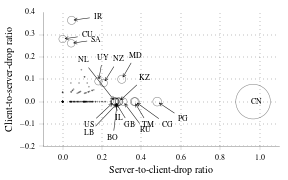

KZ 0.285714285714 0.0


In [188]:
fig1, ax1 = plt.subplots(1,1, figsize=(4,2.5))

x = tor_ratios['case1']
y = tor_ratios['case3']
z = (1/tor_ratios['case2'])*40
z[(1-tor_ratios['case2'])<0.25] = 1

labels = tor_ratios.index

ax1.scatter(x, y, s=z,  facecolors='none', edgecolors='k', alpha=0.5)
#ax1.plot([0,1],[0,1], color='b', ls='--')
for label, ix, iy in zip(labels, x, y):
    if ix+iy > 0.25:
        annotate_this(ax1, label, ix, iy)
ax1.set_xlabel('Server-to-client-drop ratio', size=10)
ax1.set_ylabel('Client-to-server-drop ratio', size=10)
#ax1.tick_params(axis='both', which='minor', labelsize=9)
ax1.grid(1)

# IGNORE OUTLIER LR
ax1.set_ylim([-.2,0.4])
ax1.set_xlim([-.1,1.1])

fig1.tight_layout()
format_axes(ax1)
fig1.savefig(PLOTS + 'torDir_case1_vs_case3')
fig1.savefig(PLOTS + 'torDir_case1_vs_case3.pdf')

In [138]:
plt.close()

# REGION WISE PCA

In [172]:
import glob
from skl

country_names = pd.read_csv('utils/iso3166.csv', names=['country','name']).fillna("NA")

data = defaultdict(list)
for files in glob.glob("utils/country_region/*.txt"):
    region = files.split('/')[-1].split(".")[0]
    if not region in ['AFRICA','ASIA_AND_PACIFIC','EUROPE','WESTERN_HEMISPHERE']:
        for line in open(files, 'r').read().split("\n"):
            if len(line) > 1:
                data['name'].append(line)
                data['region'].append(region)

In [173]:
country_to_region = pd.DataFrame(data).merge(country_names, on='name', how='left')
country_to_region['first3'] = country_to_region['name'].apply(lambda x: x[:3])
#reg = country_to_region.groupby(['country'])['region'].count()
country_to_region.to_csv('utils/country_to_region_separated.csv', index=False)

In [201]:
country_codes147 = df_all['country'].unique()
c2r = country_to_region.set_index('country')
df_country = country_to_region[country_to_region['country'].isin(country_codes147)].copy()
df_country['region'] = df_country['region'].apply(lambda x: x.replace("_", " "))
#pd.DataFrame().join()

In [210]:
df_country[df_country['region']=='PACIFIC ISLANDS']

,name,region,country,first3
208,Papua New Guinea,PACIFIC ISLANDS,PG,Pap


In [202]:
print len(df_country), len(country_codes147)

147 147


In [203]:
from sklearn.decomposition import PCA

In [259]:
df_calibrated = df_final.merge(df_country[['country','region']], on='country')

In [260]:
# IGNORE PNG
df_calibrated2 = df_calibrated[~ (df_calibrated['country']=='PG') ]

In [261]:
# get index = countries and columns = case+domain
df_description = df_calibrated2.groupby(['domain', 'region', 'case'])['port'].count().unstack().fillna(0)
censorship = get_ratios(df_description)

df = censorship[['case1','case2','case3']].unstack(0).fillna(0)

# CENSORSHIP PER DOMAIN

In [262]:
censorship.head()

case                                0   1    2  3  4  tot  err     case1  \
domain            region                                                   
24hourfitness.com CARIBBEAN         1   1   28  1  1   30    2  0.033333   
                  CENTRAL AMERICA   2   0   35  0  0   35    2  0.000000   
                  CENTRAL ASIA      4  14   33  1  2   48    6  0.291667   
                  EAST ASIA         0   3   31  0  0   34    0  0.088235   
                  EASTERN EUROPE   10   4  104  3  3  111   13  0.036036   

case                                  case2     case3  
domain            region                               
24hourfitness.com CARIBBEAN        0.933333  0.033333  
                  CENTRAL AMERICA  1.000000  0.000000  
                  CENTRAL ASIA     0.687500  0.020833  
                  EAST ASIA        0.911765  0.000000  
                  EASTERN EUROPE   0.936937  0.027027

In [263]:
# ignore outliers
#df = df.ix[valid_countries]

In [264]:
pca = PCA(n_components=2)
df3 = pd.DataFrame(pca.fit_transform(df)).set_index(df.index)

/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


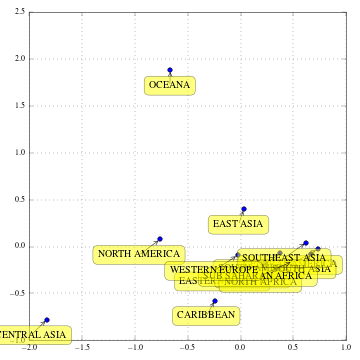

In [265]:
fig2, ax2 = plt.subplots(1,1, figsize=(5,5))
ax2.scatter(df3[0], df3[1])
for label, x, y in zip(df3.index, df3[0], df3[1]):
    ax2.annotate(
        label, 
        xy = (x, y), xytext = (20,-20),
        #xy = (x, y), xytext = (5*(np.random.randint(21)-10), 5*(np.random.randint(21)-10)),
        textcoords = 'offset points', ha = 'right', va = 'bottom', size=10,
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
ax2.grid(1)
fig2.tight_layout()
#format_axes(ax2)
#fig2.savefig(PLOTS + "PCA_projection_regions_expanded")
#fig2.savefig(PLOTS + "PCA_projection_regions_expanded.pdf")

In [266]:
df3.to_html(TABLES + "PCA_region_domain_ignore_PG.html")

## INSTEAD OF PCA: technology/censorship scatter plot global view of websites

In [267]:
df_calibrated = df_final.merge(df_country[['country','region']], on='country')
# IGNORE PNG
df_calibrated2 = df_calibrated[~ (df_calibrated['country']=='PG') ]
# get index = countries and columns = case+domain
df_description = df_calibrated2.groupby(['region', 'case'])['port'].count().unstack().fillna(0)
censorship = get_ratios(df_description)

In [275]:
censorship.to_html(TABLES + "censorship_by_region.html")

<IPython.core.display.Javascript object>


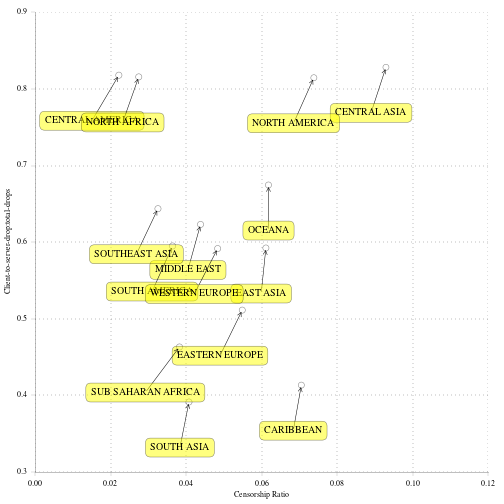

CARIBBEAN 0.0705164425359 0.413461538462
CENTRAL AMERICA 0.0222075844547 0.817796610169
CENTRAL ASIA 0.0929093619135 0.828113063407
EAST ASIA 0.0611318118305 0.592380952381
EASTERN EUROPE 0.0548763840437 0.51133222775
MIDDLE EAST 0.0438329786156 0.623121387283
NORTH AFRICA 0.0274743835154 0.815573770492
NORTH AMERICA 0.0738283757757 0.814492753623
OCEANA 0.0618141916606 0.674556213018
SOUTH AMERICA 0.036421027073 0.595
SOUTH ASIA 0.0407735321528 0.391428571429
SOUTHEAST ASIA 0.0325618127696 0.643656716418
SUB SAHARAN AFRICA 0.0382547468588 0.463226800154
WESTERN EUROPE 0.0483651491 0.591639871383


In [297]:
fig1, ax1 = plt.subplots(1,1, figsize=(7,7))

x = 1-censorship['case2']
y = censorship['case1']/(censorship['case1']+censorship['case3'])
z = (censorship['case2'])*40

labels = tor_ratios.index

ax1.scatter(x, y, s=z,  facecolors='none', edgecolors='k', alpha=0.5)
for label, ix, iy in zip(censorship.index, x, y):
    print label, ix, iy
    ax1.annotate(
        label, 
        xy = (ix, iy), xytext = (10*ix+20,-50),
        #xy = (x, y), xytext = ((np.random.randint(21)-10), (np.random.randint(21)-10)),
        textcoords = 'offset points', ha = 'right', va = 'bottom', size=10,
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

ax1.set_xlabel('Censorship Ratio')
ax1.set_ylabel('Client-to-server-drop:total-drops')
ax1.grid(1)
fig1.tight_layout()
format_axes(ax1)
fig1.savefig(PLOTS + 'censorship_technology_region_wise')
fig1.savefig(PLOTS + 'censorship_technology_region_wise.pdf')

## EXPLAINING SERVER SIDE TRASHES

In [14]:
df_bad = df_all[~df_all['sIP'].isin(df_sIP_subcat_calibrated['sIP'])]

In [19]:
df_description = df_bad.groupby(['sIP', 'domain', 'case'])['port'].count().unstack().fillna(0)
server_blocked = get_ratios(df_description)

In [20]:
df_description

case                   0  1   2   3  4
subcat       country                  
adult        AE       11  3  31   6  5
             AF        1  5  58   7  0
             AL        2  6  18  11  8
             AM        4  3  36   5  8
             AO        1  2  53  13  2
             AR        4  3  42   9  4
             AT        3  3  40   9  6
             AU        3  7  49   6  4
             AZ        2  3  45   6  5
             BA        2  1  59   7  2
             BD        2  1  50  18  1
             BE       13  6  20   9  9
             BF        1  1  58   8  0
             BG        2  0  54  11  1
             BH        3  1  50  18  0
             BI        3  0  60   7  0
             BJ        6  4  45   6  3
             BO        4  1  37   9  6
             BR        3  5  48   6  7
             BW        1  1  62   7  0
             BY        3  2  55  10  1
             CA        3  6  40   7  3
             CD        0  1  63   7  0
             CG       17  6  40   5  3
             CH        3  4  41   7  6
             CI        5  0  59   7  0
             CL        9  1  43  10  1
             CM        3  0  57  11  0
             CN       12  5  41   9  6
             CO        3  2  40  11  4
...                   .. ..  ..  .. ..
world|sports SD        0  0   7   0  0
             SE        1  0   6   0  0
             SG        2  2   3   0  0
             SI        0  0   7   0  0
             SK        0  0   5   1  0
             SL        0  0   7   0  0
             SN        0  1   5   1  0
             SO        0  0   7   0  0
             SV        0  0   7   0  0
             SY        0  0   7   0  0
             SZ        0  0   8   0  0
             TG        0  0  10   0  0
             TH        0  0   9   0  0
             TL        0  0   6   1  0
             TM        0  2   0   0  2
             TN        0  0   5   0  2
             TR        0  0   5   0  0
             TT        0  0   7   0  0
             TW        2  3   2   0  0
             TZ        0  0   4   0  1
             UA        0  0   3   0  0
             UG        0  0   7   0  0
             US        0  3   4   0  0
             UY        0  0   6   0  0
             UZ        0  0   7   0  0
             VE        0  0   7   0  0
             VN        1  2   4   0  0
             ZA        1  2   1   0  0
             ZM        0  0   5   0  0
             ZW        2  0   3   1  1

[8959 rows x 5 columns]

In [19]:
# list of sIP by subcat: use disjoint
def select_sIP_in_subcat(subcat='circum_vpn'):
    # select both circum or vpn
    sIP_by_subcat = df_sIP_subcat_disjoint.groupby('subcat')['sIP'].unique()
    #subcat = 'circum|vpn'
    sliced_sIP = []
    for categ in subcat.split('_'):
        sliced_sIP += list(sIP_by_subcat[categ])
    print subcat, sliced_sIP
    return sliced_sIP

In [174]:
df_final = df_all[df_all.sIP.isin(good_sIP)]
del df_final['subcat'], df_final['domain']
df_disjoint = df_final[['port', 'gIP', 'sIP', 'country', 'case']].merge(df_sIP_subcat_disjoint, on='sIP')
df_calibrated = df_final[['port', 'gIP', 'sIP', 'country', 'case']].merge(df_sIP_subcat_calibrated, on='sIP')

In [175]:
# REMOVE OUTLIERS
valid_countries = list(df_calibrated['country'].unique())
for c in ['PG', 'AL', 'TM', 'LR']:
    valid_countries.remove(c)
df_calibrated = df_calibrated[df_calibrated['country'].isin(valid_countries)]

valid_countries = list(df_disjoint['country'].unique())
for c in ['PG', 'AL', 'TM', 'LR']:
    valid_countries.remove(c)
df_disjoint = df_disjoint[df_disjoint['country'].isin(valid_countries)]

# PCA SUBCAT: ON DISJOINT SET

In [176]:
from sklearn.decomposition import PCA

In [177]:
df_description = df_disjoint.groupby(['subcat', 'country', 'case'])['port'].count().unstack().fillna(0)
censorship = get_ratios(df_description)

In [178]:
df = censorship[['case1','case2','case3']].unstack()

In [179]:
pca = PCA(n_components=2)
df4 = pd.DataFrame(pca.fit_transform(df)).set_index(df.index)

<IPython.core.display.Javascript object>


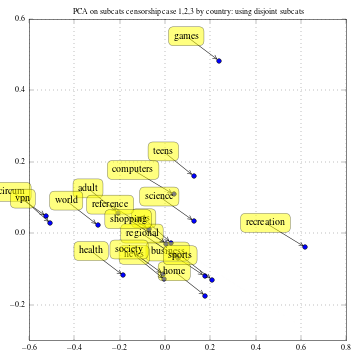

<IPython.core.display.Javascript object>

In [180]:
fig2, ax2 = plt.subplots(1,1, figsize=(5,5))
ax2.scatter(df4[0], df4[1])
for label, x, y in zip(df4.index, df4[0], df4[1]):
    ax2.annotate(
        label, 
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom', size=10,
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
ax2.grid(1)
ax2.set_title("PCA on subcats censorship case 1,2,3 by country: using disjoint subcats")
fig2.tight_layout()
#format_axes(ax2)
fig2.savefig(PLOTS + "PCA_projection_subcats")
fig2.savefig(PLOTS + "PCA_projection_subcats.pdf")

In [181]:
df4.sort([0,1]).to_html(TABLES+ "PCA_projection_subcats.html")

# PCA DOMAIN: use calibrated ratios not disjoint

In [182]:
df_description = df_calibrated.groupby(['domain', 'country', 'case'])['port'].count().unstack().fillna(0)
censorship = get_ratios(df_description)

In [183]:
df = censorship[['case1','case2','case3']].unstack().fillna(0)

In [186]:
pca = PCA(n_components=2)
df4 = pd.DataFrame(pca.fit_transform(df)).set_index(df.index)

<IPython.core.display.Javascript object>


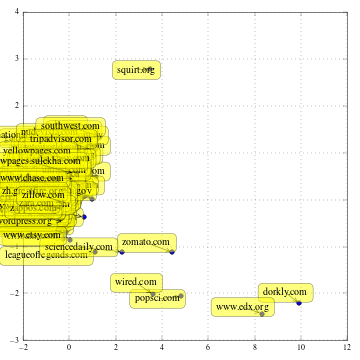

<IPython.core.display.Javascript object>

In [187]:
fig2, ax2 = plt.subplots(1,1, figsize=(5,5))
ax2.scatter(df4[0], df4[1])
for label, x, y in zip(df4.index, df4[0], df4[1]):
    ax2.annotate(
        label, 
        xy = (x, y), xytext = (np.random.randint(21)-10, np.random.randint(21)-10),
        #xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom', size=10,
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
ax2.grid(1)
fig2.tight_layout()
#format_axes(ax2)
fig2.savefig(PLOTS + "PCA_projection_domains")
fig2.savefig(PLOTS + "PCA_projection_domains.pdf")

In [188]:
df4.join(df_sIP_subcat_calibrated.set_index('domain')).sort([0,1]).to_html(TABLES+ "PCA_projection_domains.html")

# PCA countries:websites (again on calibrated)

In [189]:
# get index = countries and columns = case+domain
df_description = df_calibrated.groupby(['domain', 'country', 'case'])['port'].count().unstack().fillna(0)
censorship = get_ratios(df_description)

df = censorship[['case1','case2','case3']].unstack(0).fillna(0)

In [190]:
# ignore outliers
df = df.ix[valid_countries]

In [191]:
pca = PCA(n_components=2)
df3 = pd.DataFrame(pca.fit_transform(df)).set_index(df.index)

<IPython.core.display.Javascript object>


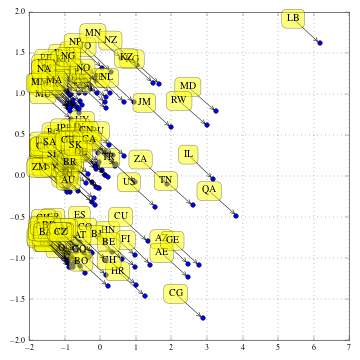

<IPython.core.display.Javascript object>

In [193]:
fig2, ax2 = plt.subplots(1,1, figsize=(5,5))
ax2.scatter(df3[0], df3[1])
for label, x, y in zip(df3.index, df3[0], df3[1]):
    ax2.annotate(
        label, 
        xy = (x, y), xytext = (-20, 20),
        #xy = (x, y), xytext = (5*(np.random.randint(21)-10), 5*(np.random.randint(21)-10)),
        textcoords = 'offset points', ha = 'right', va = 'bottom', size=10,
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
ax2.grid(1)
fig2.tight_layout()
#format_axes(ax2)
fig2.savefig(PLOTS + "PCA_projection_countries_remove_outliers")
fig2.savefig(PLOTS + "PCA_projection_countries_remove_outliers.pdf")

### Join df3 by country to a region

In [194]:
country_names = pd.read_csv('utils/iso3166.csv', names=['country','name']).fillna("NA")
country_names['country_code'] = country_names['country'].apply(lambda x: x.lower())
region_to_country = pd.read_csv('utils/imf-region-to-country.txt')
region_names = pd.read_csv('utils/imf-region-names.txt').rename(columns={
        'imf_region':'Region', 'abbrev':'imf_region'})

In [195]:
country_region = country_names.merge(region_to_country, on='country_code',
                    how='outer').merge(region_names, on='imf_region', how='outer').set_index('country')
country_region.to_csv("utils/country_region.csv")

In [196]:
df2 = df3.join(country_region, how='left').sort([0,1])

In [197]:
df2.to_html(TABLES+ "PCA_projection_countries_remove_outliers.html")

# PCA region:websites (again on calibrated)

In [223]:
df_joined = df_calibrated.join(country_region, on='country')
df_joined['region'] = df_joined['Region'].apply(lambda x: str(x).replace("_", " "))

df_description = df_joined.groupby(['domain', 'region', 'case'])['port'].count().unstack().fillna(0)
censorship = get_ratios(df_description)

In [224]:
#df_description = df_calibrated.groupby(['domain', 'country', 'case'])['port'].count().unstack().fillna(0)
#censorship = get_ratios(df_description)

In [225]:
df = censorship[['case1','case2','case3']].unstack(0).fillna(0)

In [226]:
pca = PCA(n_components=2)
df3 = pd.DataFrame(pca.fit_transform(df)).set_index(df.index)

<IPython.core.display.Javascript object>


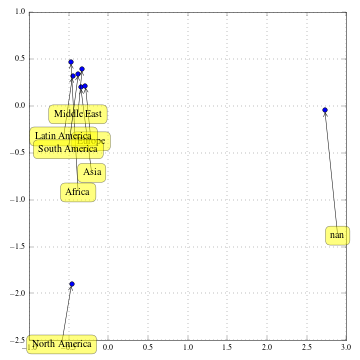

In [227]:
fig2, ax2 = plt.subplots(1,1, figsize=(5,5))
ax2.scatter(df3[0], df3[1])
for label, x, y in zip(df3.index, df3[0], df3[1]):
    ax2.annotate(
        label, 
        xy = (x, y), xytext = (+20, 5*(np.random.randint(21)-30)),
        #xy = (x, y), xytext = (5*(np.random.randint(21)-10), 5*(np.random.randint(21)-10)),
        textcoords = 'offset points', ha = 'right', va = 'bottom', size=10,
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
ax2.grid(1)
fig2.tight_layout()
#format_axes(ax2)
fig2.savefig(PLOTS + "PCA_projection_regions")
fig2.savefig(PLOTS + "PCA_projection_regions.pdf")

# SCATTER PLOT BY SUBCAT
- already ignoring the outliers

In [228]:
df_description = df_disjoint.groupby(['subcat', 'country', 'case'])['port'].count().unstack().fillna(0)
censorship = get_ratios(df_description)

In [260]:
meas_per_country = df_disjoint.groupby(['subcat', 'country'])['port'].count().unstack().T

In [261]:
#censorship['case13']= censorship['case1']+censorship['case3']
#censorship['case1/case13'] = censorship['case1']/censorship['case13']
df_cen = censorship[['case1', 'case2', 'case3']].reset_index()
df = censorship[['case1','case2','case3']].unstack(1).fillna(0)

In [7]:
df2['meas']

NameError: name 'df2' is not defined

In [262]:
subcat = 'adult'
df2 = df.ix[subcat].unstack().T
df2['meas'] = meas_per_country[subcat]

<IPython.core.display.Javascript object>


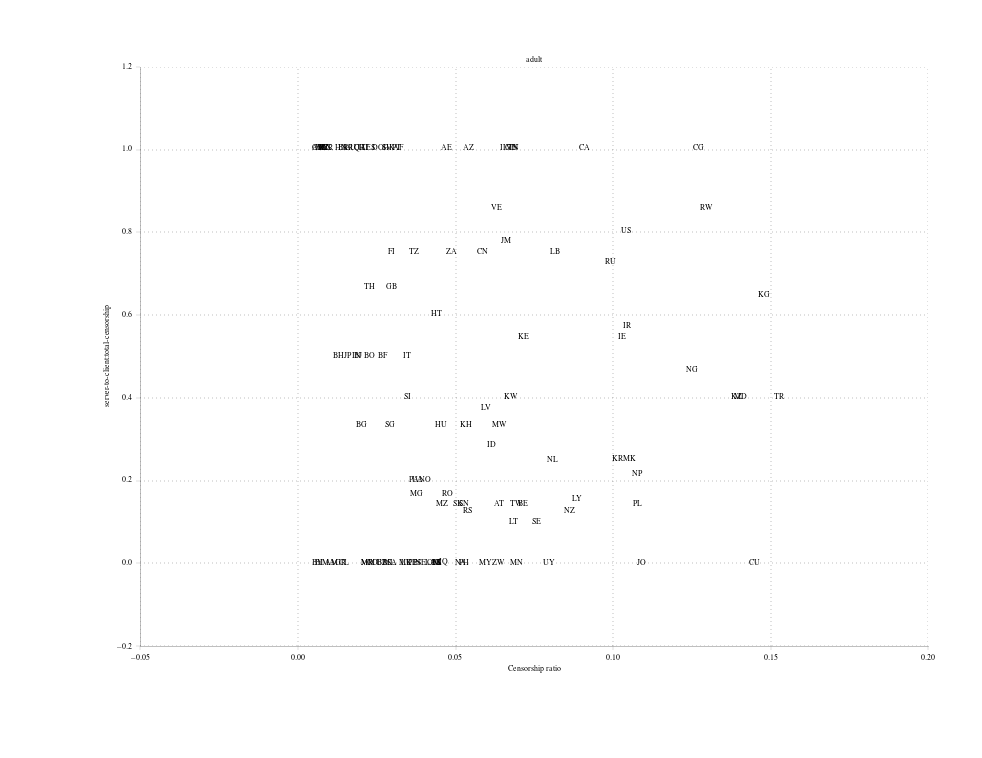

In [296]:
fig1, ax1 = plt.subplots(1,1, figsize=(4,3))
ydata = df2['case1']/(df2['case1']+df2['case3'])
xdata = df2['case1']+df2['case3']
labels = df2.index

ax1.scatter(xdata, ydata, lw = 0, c='w')
for label, x, y in zip(labels, xdata, ydata):
    if x>=0.0:
        ax1.annotate(
            label, 
            xy = (x, y),# xytext = (-20, -20),
            textcoords = 'offset points', ha = 'center', va = 'center'),
            #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
            #arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
ax1.grid(1)
#ax1.set_xscale("log")
ax1.set_xlabel("Censorship ratio")
ax1.set_ylabel("server-to-client:total-censorship")
ax1.set_title(subcat)
fig1.tight_layout()
format_axes(ax1)

# CENSORSHIP RATIOS

In [85]:
df_country_subcat = (1-censorship['case2']).unstack().T

# REMOVE OUTLIERS: LR, TM, AL, PG
valid_indices = list( df_country_subcat.index )
valid_indices.remove('LR')
valid_indices.remove('TM')
valid_indices.remove('AL')
valid_indices.remove('PG')
print len(valid_indices)

143


In [155]:
df_country_subcat

subcat,adult,arts,business,circum,computers,games,health,home,news,recreation,reference,regional,science,shopping,society,sports,teens,vpn,world
country,,,,,,,,,,,,,,,,,,,
AE,0.047059,0.076923,0.175000,0.043478,0.115385,0.070423,0.057471,0.088889,0.120000,0.163265,0.047619,0.139394,0.099099,0.088889,0.083333,0.032258,0.100000,0.023810,0.058824
AF,0.031646,0.046218,0.054622,0.047059,0.051429,0.042017,0.019355,0.027397,0.037313,0.042553,0.032710,0.043860,0.045455,0.042373,0.046358,0.048000,0.038674,0.000000,0.027027
AL,0.189873,0.220000,0.250000,0.037736,0.228916,0.309091,0.181818,0.345679,0.278351,0.410714,0.224299,0.227513,0.288000,0.272727,0.205607,0.261538,0.271845,0.090909,0.072581
AM,0.010638,0.028249,0.006369,0.000000,0.026786,0.013514,0.000000,0.022222,0.021739,0.107143,0.006757,0.029915,0.034483,0.000000,0.026087,0.024691,0.044118,0.000000,0.000000
AO,0.006329,0.012821,0.012500,0.011765,0.023256,0.008547,0.012987,0.000000,0.000000,0.021505,0.009259,0.011561,0.022831,0.000000,0.006494,0.000000,0.022222,0.000000,0.004525
AR,0.015873,0.021390,0.021858,0.000000,0.028986,0.017857,0.007937,0.054264,0.008197,0.100000,0.023529,0.018248,0.040936,0.033708,0.022222,0.020619,0.038217,0.000000,0.011299
AT,0.063636,0.058140,0.051724,0.013699,0.075000,0.068966,0.042553,0.068182,0.059406,0.101449,0.073826,0.071429,0.072368,0.025316,0.045045,0.093023,0.059701,0.000000,0.011299
AU,0.016667,0.023952,0.054217,0.000000,0.120370,0.047619,0.029412,0.010989,0.010000,0.029851,0.018750,0.015873,0.097902,0.029851,0.023256,0.074468,0.052239,0.000000,0.011111
AZ,0.054054,0.079208,0.124294,0.000000,0.119403,0.031579,0.069231,0.136364,0.138889,0.243590,0.112500,0.116279,0.103448,0.148936,0.170732,0.087912,0.092715,0.000000,0.052632


In [63]:
df = df_country_subcat.ix[valid_indices]

In [151]:
resolvers = df_disjoint.groupby(['subcat', 'country'])['gIP'].unique().apply(lambda x: len(x)).unstack().T
res = resolvers.ix[valid_indices]
num_measurements = df_disjoint.groupby(['subcat', 'country'])['gIP'].count().unstack().T
meas = num_measurements.ix[valid_indices]

In [152]:
co2country = pd.read_csv("utils/iso3166.csv", names=['country', 'name']).set_index('country').to_dict()['name']
co2country['NA'] = 'NA'

In [153]:
mydata = defaultdict(int)
for subcat in df.columns:
    tempdf = pd.DataFrame(df[subcat])
    tempdf['res'] = res[subcat]
    tempdf['meas'] = meas[subcat]
    tempdf = tempdf.sort(subcat, ascending=False).reset_index()
    tempdf['country'] = tempdf['country'].apply(lambda x: co2country[x])
    tempdf[['country', subcat, 'res']].iloc[:15].to_html(TABLES + "top_15_"+subcat+".html")
    mydata[subcat]= tempdf[['country', subcat, 'res', 'meas']].iloc[:20].set_index("country")

In [154]:
print mydata['home'].to_latex()

\begin{tabular}{lrrr}
\toprule
{} &      home &  res &  meas \\
\midrule
country              &           &      &       \\
Lebanon              &  0.229508 &   17 &    82 \\
Congo                &  0.229358 &    4 &   146 \\
Moldova, Republic of &  0.213592 &   21 &   122 \\
Tunisia              &  0.171429 &   35 &   136 \\
Cuba                 &  0.164286 &    5 &   145 \\
Georgia              &  0.160714 &   44 &   126 \\
United States        &  0.153061 &  104 &   108 \\
Kyrgyzstan           &  0.149123 &   14 &   130 \\
Finland              &  0.147287 &   49 &   143 \\
Turkey               &  0.137097 &   80 &   141 \\
Azerbaijan           &  0.136364 &    7 &   128 \\
Qatar                &  0.120000 &   35 &    79 \\
South Africa         &  0.117647 &   82 &   116 \\
Rwanda               &  0.111111 &   13 &   114 \\
Jamaica              &  0.110294 &    9 &   146 \\
Uruguay              &  0.106796 &   28 &   108 \\
Israel               &  0.103448 &   74 &   122 \\
Jordan   

In [76]:
data = defaultdict(int)
for subcat in df.columns:
    each_subcat = df[subcat].copy()
    each_subcat.sort(ascending=False)
    df_sub = pd.DataFrame(each_subcat.iloc[:10]).reset_index()
    data[subcat] = pd.DataFrame( df_sub.apply(lambda x: "%.2f"%(x[subcat])\
                + " ("+str(x['country'])+")", axis=1) )

In [80]:
pd.concat(data).unstack().T

adult       arts   business     circum  computers      games  \
0 0  0.15 (TR)  0.22 (CG)  0.22 (CU)  0.17 (CU)  0.22 (CU)  0.27 (LB)   
  1  0.15 (KG)  0.20 (US)  0.19 (MD)  0.16 (IR)  0.19 (CN)  0.22 (CU)   
  2  0.14 (CU)  0.17 (CU)  0.18 (AE)  0.16 (CN)  0.17 (CG)  0.16 (MD)   
  3  0.14 (MD)  0.15 (KG)  0.17 (LB)  0.13 (NP)  0.16 (US)  0.16 (BE)   
  4  0.14 (KZ)  0.13 (UY)  0.17 (KG)  0.11 (UY)  0.16 (KG)  0.15 (UY)   
  5  0.13 (RW)  0.13 (TR)  0.17 (US)  0.10 (CG)  0.14 (HN)  0.15 (IL)   
  6  0.13 (CG)  0.12 (NP)  0.16 (GE)  0.10 (SE)  0.13 (NZ)  0.15 (MK)   
  7  0.12 (NG)  0.12 (JM)  0.16 (IL)  0.10 (KZ)  0.13 (KZ)  0.14 (HU)   
  8  0.11 (JO)  0.11 (MD)  0.16 (CG)  0.09 (MD)  0.13 (MD)  0.14 (RW)   
  9  0.11 (PL)  0.11 (FI)  0.16 (TN)  0.09 (KG)  0.12 (RW)  0.14 (NP)   

        health       home       news recreation  reference   regional  \
0 0  0.24 (CG)  0.23 (LB)  0.20 (KG)  0.34 (MD)  0.20 (CU)  0.21 (CU)   
  1  0.12 (JO)  0.23 (CG)  0.18 (CU)  0.27 (LB)  0.18 (CG)  0.16 (CG)   
  2  0.11 (US)  0.21 (MD)  0.17 (IL)  0.24 (AZ)  0.14 (RW)  0.14 (GE)   
  3  0.11 (IE)  0.17 (TN)  0.15 (LB)  0.22 (CU)  0.13 (CN)  0.14 (US)   
  4  0.10 (KG)  0.16 (CU)  0.15 (MD)  0.21 (NP)  0.12 (MD)  0.14 (AE)   
  5  0.10 (GE)  0.16 (GE)  0.15 (US)  0.21 (TN)  0.11 (AZ)  0.13 (LB)   
  6  0.10 (TR)  0.15 (US)  0.14 (AZ)  0.19 (JM)  0.11 (NP)  0.13 (MD)   
  7  0.10 (CU)  0.15 (KG)  0.14 (CG)  0.19 (GE)  0.11 (US)  0.12 (KG)   
  8  0.10 (MD)  0.15 (FI)  0.12 (TR)  0.19 (TR)  0.11 (TR)  0.12 (IL)   
  9  0.10 (LB)  0.14 (TR)  0.12 (AE)  0.19 (US)  0.11 (KZ)  0.12 (AZ)   

       science   shopping    society     sports      teens        vpn  \
0 0  0.25 (CG)  0.18 (US)  0.18 (CG)  0.25 (LB)  0.22 (CG)  0.14 (CU)   
  1  0.18 (LB)  0.17 (MD)  0.17 (AZ)  0.25 (CU)  0.20 (CU)  0.14 (BE)   
  2  0.17 (CU)  0.15 (CU)  0.17 (GE)  0.19 (TR)  0.19 (MD)  0.13 (CG)   
  3  0.13 (QA)  0.15 (AZ)  0.15 (CU)  0.19 (CG)  0.13 (US)  0.12 (UY)   
  4  0.12 (GE)  0.15 (NL)  0.15 (MD)  0.18 (US)  0.13 (TR)  0.11 (NP)   
  5  0.12 (MD)  0.14 (NZ)  0.14 (US)  0.18 (GE)  0.12 (NP)  0.11 (UZ)   
  6  0.12 (BE)  0.14 (IL)  0.13 (TN)  0.18 (IL)  0.12 (IL)  0.10 (PL)   
  7  0.11 (ZW)  0.13 (LB)  0.12 (KG)  0.17 (JM)  0.12 (LB)  0.10 (JO)   
  8  0.11 (NZ)  0.12 (NP)  0.12 (SE)  0.16 (ZA)  0.11 (RW)  0.08 (TR)   
  9  0.11 (IL)  0.12 (CG)  0.11 (ZW)  0.15 (MD)  0.11 (SE)  0.07 (SE)   

         world  
0 0  0.22 (CU)  
  1  0.14 (MD)  
  2  0.13 (IR)  
  3  0.11 (KG)  
  4  0.10 (CG)  
  5  0.10 (MW)  
  6  0.10 (ID)  
  7  0.10 (JO)  
  8  0.10 (MK)  
  9  0.09 (US)

In [81]:
df

subcat,adult,arts,business,circum,computers,games,health,home,news,recreation,reference,regional,science,shopping,society,sports,teens,vpn,world
country,,,,,,,,,,,,,,,,,,,
AE,0.047059,0.076923,0.175000,0.043478,0.115385,0.070423,0.057471,0.088889,0.120000,0.163265,0.047619,0.139394,0.099099,0.088889,0.083333,0.032258,0.100000,0.023810,0.058824
AF,0.031646,0.046218,0.054622,0.047059,0.051429,0.042017,0.019355,0.027397,0.037313,0.042553,0.032710,0.043860,0.045455,0.042373,0.046358,0.048000,0.038674,0.000000,0.027027
AM,0.010638,0.028249,0.006369,0.000000,0.026786,0.013514,0.000000,0.022222,0.021739,0.107143,0.006757,0.029915,0.034483,0.000000,0.026087,0.024691,0.044118,0.000000,0.000000
AO,0.006329,0.012821,0.012500,0.011765,0.023256,0.008547,0.012987,0.000000,0.000000,0.021505,0.009259,0.011561,0.022831,0.000000,0.006494,0.000000,0.022222,0.000000,0.004525
AR,0.015873,0.021390,0.021858,0.000000,0.028986,0.017857,0.007937,0.054264,0.008197,0.100000,0.023529,0.018248,0.040936,0.033708,0.022222,0.020619,0.038217,0.000000,0.011299
AT,0.063636,0.058140,0.051724,0.013699,0.075000,0.068966,0.042553,0.068182,0.059406,0.101449,0.073826,0.071429,0.072368,0.025316,0.045045,0.093023,0.059701,0.000000,0.011299
AU,0.016667,0.023952,0.054217,0.000000,0.120370,0.047619,0.029412,0.010989,0.010000,0.029851,0.018750,0.015873,0.097902,0.029851,0.023256,0.074468,0.052239,0.000000,0.011111
AZ,0.054054,0.079208,0.124294,0.000000,0.119403,0.031579,0.069231,0.136364,0.138889,0.243590,0.112500,0.116279,0.103448,0.148936,0.170732,0.087912,0.092715,0.000000,0.052632
BA,0.000000,0.012987,0.000000,0.000000,0.023121,0.008547,0.006494,0.000000,0.022059,0.044444,0.004695,0.023529,0.028169,0.008333,0.006757,0.008000,0.022857,0.016393,0.009050


## Per Subcat Ratios Global

In [65]:
c2 = get_censorship_by_country_sIP(df_sanitized2, 2)['global']
c1 = get_censorship_by_country_sIP(df_sanitized2, 1)['global']
c3 = get_censorship_by_country_sIP(df_sanitized2, 3)['global']
unknown = get_censorship_by_country_sIP(df_sanitized2, 'err')['global']
tot = get_censorship_by_country_sIP(df_sanitized2, 'tot')['global']

In [185]:
df_cen = pd.DataFrame({'1':c1, '2':c2, '3':c3, 'err':unknown, 'tot':tot}).reset_index()
del df_cen['subcat'], df_cen['domain']

In [186]:
len(df_sIP_subcat_disjoint)

536

In [187]:
df_censorship = df_cen.merge(df_sIP_subcat_disjoint, on='sIP')

In [198]:
df_per_subcat = df_censorship.groupby('subcat').sum()
df_per_subcat['case1'] = df_per_subcat['1']/(df_per_subcat['tot']+df_per_subcat['err'])
df_per_subcat['case2'] = df_per_subcat['2']/(df_per_subcat['tot']+df_per_subcat['err'])
df_per_subcat['case3'] = df_per_subcat['3']/(df_per_subcat['tot']+df_per_subcat['err'])
#case2 = df_per_subcat.
#case1 = df_per_subcat['1'].sum()/df_per_subcat['tot'].sum()
#case3 = df_per_subcat['3'].sum()/df_per_subcat['tot'].sum()

<IPython.core.display.Javascript object>


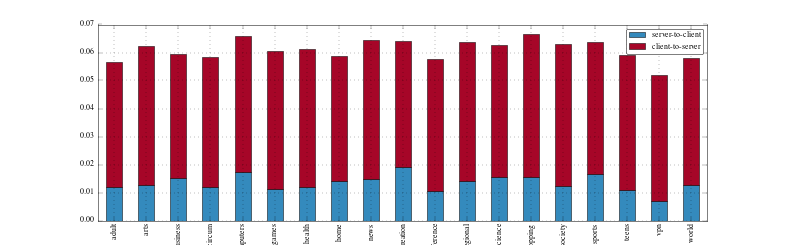

In [200]:
fig1, ax1 = plt.subplots(1,1)
df = df_per_subcat[['case1','case3']].rename(columns = {'case2': 'no-censorship',
                                                        'case1':'server-to-client',
                                                        'case3':'client-to-server'})
df.plot(kind='bar', stacked=True, ax=ax1)

In [184]:
df_per_subcat['case1'] = df_per_subcat['1']/(df_per_subcat['tot']+df_per_subcat['err'])
df_per_subcat['case2'] = df_per_subcat['2']/(df_per_subcat['tot']+df_per_subcat['err'])
df_per_subcat['case3'] = df_per_subcat['3']/(df_per_subcat['tot']+df_per_subcat['err'])
df_per_subcat['case13'] = (df_per_subcat['1']+df_per_subcat['3'])/(df_per_subcat['tot']+df_per_subcat['err'])

KeyError: 'err'

# LOAD

In [6]:
censorship_tot = get_censorship_by_country_sIP(df_mock, 'tot')

In [8]:
censorship_tot['global']

201758.0

In [8]:
censorship = get_censorship_by_country_sIP(df_mock)[['US','SE']]
totals = get_censorship_by_country_sIP(df_mock, 'tot')[['US','SE']]
case1 = get_censorship_by_country_sIP(df_mock, 1)[['US','SE']]
case3 = get_censorship_by_country_sIP(df_mock, 3)[['US','SE']]

censorship['US-tot'] = totals['US']
censorship['SE-tot'] = totals['SE']
censorship['US-1'] = case1['US']
censorship['US-3'] = case3['US']
censorship['SE-1'] = case1['SE']
censorship['SE-3'] = case3['SE']

del totals, case1, case3

censorship = censorship.reset_index()
censorship.head()

country,sIP,domain,subcat,US,SE,US-tot,SE-tot,US-1,US-3,SE-1,SE-3
0,1.209.122.23,riseup.net,circum,0.053097,0.093750,113,32,1,5,0,3
1,103.6.182.20,agoda.com,world|recreation,0.527778,0.178571,144,56,66,10,4,6
2,104.130.112.72,express-vpn.com,vpn,0.090909,0.102041,55,49,0,5,0,5
3,104.16.5.13,change.org,society,0.988889,1.000000,90,60,0,89,0,60
4,104.16.7.118,petmd.com,health,1.000000,1.000000,96,48,1,95,0,48


In [9]:
len(df_mock['sIP'].unique())

474

In [10]:
df_censorship_US_SE = df_sIP_subcat_orig.merge(censorship[['sIP', 'US', 'US-tot', 'US-1', 'US-3',
                                                 'SE', 'SE-tot', 'SE-1', 'SE-3']], on='sIP')
del df_censorship_US_SE['subcat']

In [11]:
df_IP_reachability = pd.read_pickle("results/sIP_sanitize_20150426/" + "df_IP_reachability.pkl")
df_domain_IP_mapping = pd.read_pickle("results/sIP_sanitize_20150426/" + "df_domain_IP_mapping.pkl")
del df_domain_IP_mapping['subcat']

In [12]:
print len(df_IP_reachability), len(df_domain_IP_mapping), len(df_censorship_US_SE)

580 580 473


In [13]:
# merge in order to preserve COLUMNS order
df_temp = df_IP_reachability.merge( df_domain_IP_mapping, on=['sIP', 'domain'], how='outer' )
df_temp2 = df_temp.merge( df_censorship_US_SE, on=['sIP', 'domain'], how='outer' )
print df_temp2.columns

df_final = df_temp2.sort(columns=["US", "US-tot"], ascending=[False, False]).reset_index()
del df_final['index']
df_final.head()

Index([u'sIP', u'domain', u'subcat', u'dig_x', u'anycast', u'slash24', u'slash24_shared', u'dig', u'DNS_contains', u'http_domain', u'http_domain2', u'http_ipaddr1', u'http_ipaddr2', u'sIP_http_reach', u'US', u'US-tot', u'US-1', u'US-3', u'SE', u'SE-tot', u'SE-1', u'SE-3'], dtype='object')


,sIP,domain,subcat,dig_x,anycast,slash24,slash24_shared,dig,DNS_contains,http_domain,...,http_ipaddr2,sIP_http_reach,US,US-tot,US-1,US-3,SE,SE-tot,SE-1,SE-3
0,104.20.12.28,studentdoctor.net,[health],[],"CloudFlare, Inc. United States",104.20.12,1,"[104.20.13.28, 104.20.12.28]",True,403,...,301,True,1,101,1,100,1,29,0,29
1,90.216.128.5,sky.com,"[arts, regional, shopping]",[],-1,90.216.128,1,[90.216.128.5],True,200,...,302,True,1,98,46,52,1,43,0,43
2,104.16.7.118,petmd.com,[health],[],"CloudFlare, Inc. United States",104.16.7,1,"[104.16.7.118, 104.16.11.118, 104.16.9.118, 10...",True,403,...,301,True,1,96,1,95,1,48,0,48
3,141.101.113.126,planetminecraft.com,[games],[],"CloudFlare, Inc. European Union",141.101.113,1,"[190.93.240.126, 141.101.123.126, 190.93.241.1...",True,403,...,403,False,1,94,0,94,1,53,0,53
4,104.20.28.34,tunnelbear.com,[vpn],[],"CloudFlare, Inc. United States",104.20.28,2,"[104.20.29.34, 104.20.28.34]",True,200,...,302,True,1,87,0,87,1,47,0,47


## TRY: CUT OFF AT 0.1 THRESH

In [30]:
THRESH = 0.10
MEAS = 15

df_filtered = df_final[ (df_final['US-tot'] >= MEAS) & (df_final['SE-tot'] >= MEAS) ]
aggressive =  df_filtered [ (df_filtered['US'] <= THRESH) & (df_filtered['SE'] <= THRESH) ]

len(aggressive['sIP'].unique())

135

In [31]:
servers_imc = aggressive[['sIP', 'domain', 'subcat']].copy()
servers_imc['subcat'] = servers_imc['subcat'].apply(lambda x: "|".join(x))
servers_imc.to_csv("data/aggressive_drop_servers_imc.txt")

### 1. Reject http-IP reachability errors not in range (200,400) (except TorDirs) + Anything in cloudflare anycast confirmed 
- 'sIP_http_reach' == True or torDir
- anycast contains cloudflare
- go 580 --> 517

In [284]:
df_short = df_final[[u'sIP', u'domain', u'subcat', u'dig_x', u'anycast',
           u'DNS_contains', u'http_domain', u'http_domain2',
           u'sIP_http_reach',
           u'US', u'US-tot', u'US-1', u'US-3', 
           u'SE', u'SE-tot', u'SE-1', u'SE-3']].copy()

In [285]:
df_short['anycast'] = df_short['anycast'].replace({-1:''})
df_short['cloudflare'] = df_short['anycast'].apply(lambda x: 'CloudFlare' in x)

keep_HTTP_IP = df_short[ (df_short['sIP_http_reach'] == True) |
                    (df_short['domain'] == 'torDir')]

not_cloudflare = keep_HTTP_IP[keep_HTTP_IP['cloudflare'] == False]

print len(df_short[df_short['cloudflare'] == True])
print len(keep_HTTP_IP)
print len(not_cloudflare)
print len(df_short) -  len(keep_HTTP_IP)

25
541
517
39


#2. Reject domains with < 15 meas from BOTH US/SE (except tor/vpns)
- go 517 --> 387

In [286]:
def check_interesting_subcat(x):
    if ('vpn' in x) or ('circum' in x):
        return 1
    return 0

df = not_cloudflare
more_meas = df[ (df['US-tot'] >= 15) & (df['SE-tot'] >= 15)]
less_meas = df[ (df['US-tot'] < 15) | (df['SE-tot'] < 15) ].copy()
less_meas['important'] = less_meas['subcat'].apply(check_interesting_subcat)

In [287]:
print len(df), len(more_meas), len(less_meas), len(less_meas[less_meas['important']==1])

517 387 32 1


In [288]:
less_meas[less_meas['important']==1]

,sIP,domain,subcat,dig_x,anycast,DNS_contains,http_domain,http_domain2,sIP_http_reach,US,US-tot,US-1,US-3,SE,SE-tot,SE-1,SE-3,cloudflare,important
73,216.239.32.21,oneswarm.org,[circum],[any-in-2015.1e100.net.],Google Inc. United States,True,200,NaN,True,0.512195,41,0,21,0.928571,14,0,13,False,1


#3. REJECT UNREASONABLY HIGH CENSORED DOMAINS based on GT
- go 387 --> 297 (+1 from prev)
- draw CDF of censorship
- out of 387, those with [KNEE] censorship should be cut off
- 0.2 is based on CDF of censorship in US AND SE over all 387 websites

In [290]:
fig1, ax1 = plt.subplots(1,1)

x,y = getCDF( list( more_meas['US']) )
ax1.plot(x,y, label='US', lw=2, marker='.', markevery=10)
x,y = getCDF( list( more_meas['SE']) )
ax1.plot(x,y, label='SE', lw=2, ls='--', marker='+', markevery=10)

ax1.axvline(0.2, color='k', ls='-.')

ax1.set_xlabel("censorship ratio per domain")
ax1.set_ylabel("CDF of domains")
ax1.grid(1)
ax1.legend(loc='best')
fig1.tight_layout()
format_axes(ax1)
fig1.savefig(PLOTS + "knee_plot_Apr12_20perc_cutoff")
fig1.savefig(PLOTS + "knee_plot_Apr12_20perc_cutoff.pdf")

<IPython.core.display.Javascript object>

### Reject: final output list of domains to consider (sanitized)

In [302]:
# accepted healthy sIPs with thresh 0.2
THRESH = 0.2
df_final = more_meas[ ( (more_meas['US'] <= THRESH) & (more_meas['SE'] <= THRESH) ) ]
#df_final[['sIP', 'domain', 'subcat']].to_csv('data/Servers_IMC_censorship15_healthy.txt', index=False)

print len(more_meas), len(df_final)

387 297


In [303]:
df_servers_IMC = pd.concat([df_final, less_meas[less_meas['important'] == 1]])
df_servers_IMC['subcat'] = df_servers_IMC['subcat'].apply(lambda x: "|".join(x))
print len(df_final), len(less_meas[less_meas['important'] == 1]), len(df_servers_IMC)

297 1 298


In [304]:
df_servers_IMC[['sIP', 'domain', 'subcat']].to_csv('data/Servers_IMC-fixed.txt', index=False)

#<font color='red'>TABLE of sIP vs Subcat, num_meas vs Subcats, sIP-gIP vs Subcats
- use updated servers IMC or old?

## sIP_subcat sanitized

In [3]:
# UPDATED SERVERS IMC
df_sIP_subcat = pd.read_csv("data/Servers_IMC-fixed.txt")
df_sIP_subcat['subcat'] = df_sIP_subcat['subcat'].apply(lambda x: x.replace('kids_and_teens', 'teens'))


subcat_duplicated = defaultdict(list)
for ix, row in df_sIP_subcat.iterrows():
    if len(row[2].split("|"))>1:
        shared = 1
    else:
        shared = 0
    for subcat in row[2].split("|"):
        if subcat == 'kids_and_teens':
            subcat = 'teens'
        subcat_duplicated['sIP'].append(row[0])
        subcat_duplicated['domain'].append(row[1])
        subcat_duplicated['subcat'].append(subcat)
        subcat_duplicated['shared'].append(shared)
df_sIP_subcat_disjoint = pd.DataFrame(subcat_duplicated)

#df_sIP_subcat_disjoint.to_csv("data/Servers_IMC_disjoint_sIP.txt")
df_sIP_subcat_general = df_sIP_subcat.copy()
df_sIP_subcat_general['subcat'] = df_sIP_subcat_general['subcat'].apply(lambda x: 'general' if '|' in x else x)
df_sIP_subcat_unshared = df_sIP_subcat_disjoint[df_sIP_subcat_disjoint['shared']==0]
df_sIP_subcat_shared = df_sIP_subcat_disjoint[df_sIP_subcat_disjoint['shared']==1]

In [4]:
df_sIP_subcat_disjoint.head()

,domain,sIP,shared,subcat
0,femjoy.com,37.72.173.157,0,adult
1,kohls.com,23.198.144.45,0,shopping
2,opentable.com,66.151.130.32,0,recreation
3,bestbuy.com,207.108.220.154,1,regional
4,bestbuy.com,207.108.220.154,1,shopping


In [5]:
valid_sIP = list(df_sIP_subcat['sIP'])
print len( df_sIP_subcat ), len(valid_sIP)

298 298


In [6]:
# OLD SERVERS IMC
#df_sIP_subcat = pd.read_csv("data/Servers_IMC.txt")
#df_sIP_subcat_disjoint = pd.read_csv(DATA + "Servers_IMC_disjoint_sIP.txt")
#df_sIP_subcat_unshared = df_sIP_subcat_disjoint[df_sIP_subcat_disjoint['shared']==0]

### sIP vs subcats survived in 317

In [7]:
subcat_hist = pd.DataFrame({'unshared': df_sIP_subcat_unshared.groupby('subcat')['domain'].count(),
                           'disjoint': df_sIP_subcat_disjoint.groupby('subcat')['domain'].count()})
subcat_hist.T

subcat,adult,arts,business,circum,computers,games,health,home,news,recreation,reference,regional,science,shopping,society,sports,teens,vpn,world
disjoint,19,31,30,15,25,15,21,18,22,20,29,51,30,23,18,16,24,11,42
unshared,19,10,8,15,7,7,9,11,2,10,13,2,14,11,9,9,3,10,22


## ALL VALID MEASUREMENTS

In [8]:
df_all1 = pd.read_pickle(DATA + "case_detected_all_20150423.pkl")
df_all2 = pd.read_pickle(DATA + "case_detected_all_20150427.pkl")
df_all = pd.concat([df_all1,df_all2])
print len(df_all1), len(df_all2), len(df_all)

250593 146328 396921


In [10]:
del df_all1, df_all2, df_mock

NameError: name 'df_all1' is not defined

## measurements per subcat

In [52]:
valid_sIP = list(df_sIP_subcat_disjoint['sIP'])
df_final = df_all[df_all['sIP'].isin( valid_sIP )]

### disjoint: total, %unknown, %censor

In [53]:
df = df_final[['sIP', 'country', 'case']].merge(df_sIP_subcat_disjoint, on=['sIP'])
subcat_ratios = { 'censor': df[df['case'].isin([1,3])].groupby('subcat')['domain'].count(),
              'unknown': df[df['case'].isin([0,4])].groupby('subcat')['domain'].count(),
              'total': df.groupby('subcat')['domain'].count()}
subcat_ratios['unknown_cases(%total)'] = subcat_ratios['unknown']/subcat_ratios['total']
subcat_ratios['censorship(%known)'] = subcat_ratios['censor']/( subcat_ratios['total'] - subcat_ratios['unknown']) 

In [54]:
data_disjoint = pd.DataFrame({'sIP per subcat': subcat_hist['disjoint']})
data_disjoint['total measurements'] = subcat_ratios['total']
data_disjoint['unknown cases (%total)'] = subcat_ratios['unknown_cases(%total)']
data_disjoint['censorship (%known)'] = subcat_ratios['censorship(%known)']

### unshared: total, %unknown, %censor

In [55]:
df = df_final[['sIP', 'country', 'case']].merge(df_sIP_subcat_unshared, on=['sIP'])
subcat_ratios = { 'censor': df[df['case'].isin([1,3])].groupby('subcat')['domain'].count(),
              'unknown': df[df['case'].isin([0,4])].groupby('subcat')['domain'].count(),
              'total': df.groupby('subcat')['domain'].count()}
subcat_ratios['unknown_cases(%total)'] = subcat_ratios['unknown']/subcat_ratios['total']
subcat_ratios['censorship(%known)'] = subcat_ratios['censor']/( subcat_ratios['total'] - subcat_ratios['unknown'])

In [56]:
data_unshared = pd.DataFrame({'sIP per subcat': subcat_hist['unshared']})
data_unshared['total measurements'] = subcat_ratios['total']
data_unshared['unknown cases (%total)'] = subcat_ratios['unknown_cases(%total)']
data_unshared['censorship (%known)'] = subcat_ratios['censorship(%known)']

In [57]:
sIP_categ_stats = pd.concat({'disjoint':data_disjoint, 'unshared':data_unshared}).unstack(0)
sIP_categ_stats.to_html(TABLES + "sIP_per_subcat_stats.html")
sIP_categ_stats.head()

sIP per subcat          total measurements           \
                disjoint unshared           disjoint unshared   
subcat                                                          
adult                 19       19              16095    16095   
arts                  31       10              26218     8581   
business              30        8              23980     6177   
circum                15       15              10586    10586   
computers             25        7              19084     5672   

          unknown cases (%total)           censorship (%known)            
                        disjoint  unshared            disjoint  unshared  
subcat                                                                    
adult                   0.103759  0.103759            0.053241  0.053241  
arts                    0.104203  0.098823            0.041259  0.033881  
business                0.094829  0.097296            0.048374  0.048063  
circum                  0.081334  0.081334            0.100257  0.100257  
computers               0.106529  0.097144            0.047094  0.038664

#<font color='red'> TABLE FOR WHO CENSORS THE MOST/LEAST IN EACH SUBCAT

#### max censor country + val, min censor country + val

In [58]:
df = df_final[['sIP', 'country', 'case']].merge(df_sIP_subcat_disjoint, on=['sIP'])

In [59]:
by_country = pd.DataFrame( {'censor': df[df['case'].isin([1,3])].groupby(['subcat', 'country'])['domain'].count() } )
by_country['total'] = df.groupby(['subcat', 'country'])['domain'].count()
by_country['unknown'] =  df[df['case'].isin([0,4])].groupby(['subcat', 'country'])['domain'].count()
by_country['known'] = by_country['total'] - by_country['unknown']
by_country['censorship (%known)'] = by_country['censor']/by_country['known'] 
by_country['unknown (%total)'] = by_country['unknown']/by_country['total']

In [60]:
#pd.DataFrame({ 'CO': by_country['censorship (%known)'].unstack().idxmax(axis=1),
# 'censorship': by_country['censorship (%known)'].unstack().max(axis=1) })

In [61]:
#pd.DataFrame({ 'CO': by_country['censorship (%known)'].unstack().idxmin(axis=1),
# 'censorship': by_country['censorship (%known)'].unstack().min(axis=1) })

### The above results may be incorrect due to lack of measurements => consider only countries with at least 30 measurements in each subcat
- drop low meas (nan)

In [62]:
by_country['total'].unstack().T.reset_index().to_html(TABLES + "ALL_country_subcat_total_measurements_disjoint.html")

In [63]:
by_subcat_total = by_country['total'].unstack().dropna(axis=1).T
by_subcat_total.to_html(TABLES + "valid_country_subcat_total_measurements_disjoint.html")
valid_countries_filter = by_subcat_total.index
print valid_countries_filter, len(valid_countries_filter)

Index([u'AE', u'AL', u'BE', u'CA', u'CG', u'CH', u'CO', u'CU', u'FI', u'HK', u'HU', u'ID', u'IE', u'IN', u'IR', u'JM', u'JO', u'KG', u'LB', u'LR', u'LT', u'LV', u'MD', u'MN', u'MW', u'MY', u'NG', u'NL', u'NO', u'NP', u'NZ', u'PG', u'PL', u'RS', u'RU', u'RW', u'SE', u'SG', u'SK', u'SN', u'SV', u'TH', u'TR', u'TW', u'UA', u'US', u'UY', u'UZ', u'ZA', u'ZW'], dtype='object') 50


In [64]:
by_subcat_unknown = by_country['unknown'].unstack().T.ix[valid_countries_filter]
by_subcat_censor = by_country['censor'].unstack().T.ix[valid_countries_filter]

In [65]:
pd.DataFrame( { 'max_CO':by_subcat_total.idxmax() , 'max_meas': by_subcat_total.max(),
               'min_CO':by_subcat_total.idxmin(), 'min_meas': by_subcat_total.min() } )

,max_CO,max_meas,min_CO,min_meas
subcat,,,,
adult,SV,127,LB,51
arts,CG,199,LB,117
business,CG,189,LB,100
circum,CG,82,LB,47
computers,CG,150,LB,74
games,JO,99,LB,54
health,FI,119,LB,60
home,UZ,110,LB,58
news,CG,121,LB,71


In [66]:
# once dropped, just fillna with 0
by_subcat_ratio = (by_subcat_censor/ (by_subcat_total-by_subcat_unknown) ).fillna(0)
by_subcat_ratio.to_html(TABLES + "valid_country_subcat_censorship_ratio.html")

In [67]:
print "TOTAL VALID COUNTRIES LEFT", len( by_subcat_ratio )

TOTAL VALID COUNTRIES LEFT 50


In [68]:
MAX_CENSOR = pd.DataFrame({'country': by_subcat_ratio.idxmax(), 'max': by_subcat_ratio.max()})
MAX_CENSOR['max'] = MAX_CENSOR['max'].apply( lambda x: "{0:.1f}".format(x) )
MAX_CENSOR['co_max'] = MAX_CENSOR.apply(lambda x: x['country']+": "+x['max'], axis=1)
MAX_CENSOR

,country,max,co_max
subcat,,,
adult,LR,0.6,LR: 0.6
arts,LR,0.6,LR: 0.6
business,LR,0.7,LR: 0.7
circum,LR,0.5,LR: 0.5
computers,LR,0.6,LR: 0.6
games,LR,0.5,LR: 0.5
health,LR,0.6,LR: 0.6
home,LR,0.7,LR: 0.7
news,LR,0.6,LR: 0.6


In [69]:
MIN_CENSOR = pd.DataFrame({'country': by_subcat_ratio.idxmin(), 'min': by_subcat_ratio.min()})
MIN_CENSOR['min'] = MIN_CENSOR['min'].apply( lambda x: "{0:.1f}".format(x) )
MIN_CENSOR['co_min'] = MIN_CENSOR.apply(lambda x: x['country']+": "+x['min'], axis=1)
MIN_CENSOR

,country,min,co_min
subcat,,,
adult,TH,0.0,TH: 0.0
arts,SV,0.0,SV: 0.0
business,HK,0.0,HK: 0.0
circum,UY,0.0,UY: 0.0
computers,LT,0.0,LT: 0.0
games,TH,0.0,TH: 0.0
health,JO,0.0,JO: 0.0
home,SV,0.0,SV: 0.0
news,PL,0.0,PL: 0.0


In [70]:
data_disjoint['max censorship'] = MAX_CENSOR['co_max']
data_disjoint['min censorship'] = MIN_CENSOR['co_min']

In [71]:
data_disjoint.to_html(TABLES + "subcat_data_description_disjoint.html")
data_disjoint

,sIP per subcat,total measurements,unknown cases (%total),censorship (%known),max censorship,min censorship
subcat,,,,,,
adult,19,16095,0.103759,0.053241,LR: 0.6,TH: 0.0
arts,31,26218,0.104203,0.041259,LR: 0.6,SV: 0.0
business,30,23980,0.094829,0.048374,LR: 0.7,HK: 0.0
circum,15,10586,0.081334,0.100257,LR: 0.5,UY: 0.0
computers,25,19084,0.106529,0.047094,LR: 0.6,LT: 0.0
games,15,12770,0.103602,0.046737,LR: 0.5,TH: 0.0
health,21,15182,0.088328,0.030995,LR: 0.6,JO: 0.0
home,18,14011,0.104132,0.042702,LR: 0.7,SV: 0.0
news,22,15965,0.094457,0.043093,LR: 0.6,PL: 0.0


## SHARED

### max censor country + val, min censor country + val

In [72]:
df = df_final[['sIP', 'country', 'case']].merge(df_sIP_subcat_unshared, on=['sIP'])

In [73]:
by_country = pd.DataFrame( {'censor': df[df['case'].isin([1,3])].groupby(['subcat', 'country'])['domain'].count() } )
by_country['total'] = df.groupby(['subcat', 'country'])['domain'].count()
by_country['unknown'] =  df[df['case'].isin([0,4])].groupby(['subcat', 'country'])['domain'].count()
by_country['known'] = by_country['total'] - by_country['unknown']
by_country['censorship (%known)'] = by_country['censor']/by_country['known'] 
by_country['unknown (%total)'] = by_country['unknown']/by_country['total'] 

In [74]:
by_subcat_total = by_country['total'].unstack().dropna(axis=1).T
valid_countries_filter = by_subcat_total.index
print valid_countries_filter, len(valid_countries_filter)

Index([u'LR', u'PG', u'US'], dtype='object') 3


In [75]:
by_country['total'].unstack().T.reset_index().to_html(TABLES + "ALL_country_subcat_total_measurements_unshared.html")
by_subcat_total.to_html(TABLES + "valid_country_subcat_total_measurements_unshared.html")

In [76]:
by_subcat_unknown = by_country['unknown'].unstack().T.ix[valid_countries_filter]
by_subcat_censor = by_country['censor'].unstack().T.ix[valid_countries_filter]
by_subcat_ratio = (by_subcat_censor/ (by_subcat_total-by_subcat_unknown) ).fillna(0)

### Only 3 countries survive: LR, PG, US
- makes no sense to compare

In [77]:
by_subcat_total

subcat,adult,arts,business,circum,computers,games,health,home,news,recreation,reference,regional,science,shopping,society,sports,teens,vpn,world
country,,,,,,,,,,,,,,,,,,,
LR,114,62,42,70,37,44,51,62,14,46,69,4,81,62,46,45,21,56,124
PG,97,46,33,57,29,26,35,44,11,26,57,5,56,45,32,30,18,49,113
US,87,54,42,60,29,39,44,52,13,43,51,7,74,47,43,34,13,45,119


In [78]:
pd.DataFrame( { 'max_CO':by_subcat_total.idxmax() , 'max_meas': by_subcat_total.max(),
               'min_CO':by_subcat_total.idxmin(), 'min_meas': by_subcat_total.min() } )

,max_CO,max_meas,min_CO,min_meas
subcat,,,,
adult,LR,114,US,87
arts,LR,62,PG,46
business,LR,42,PG,33
circum,LR,70,PG,57
computers,LR,37,PG,29
games,LR,44,PG,26
health,LR,51,PG,35
home,LR,62,PG,44
news,LR,14,PG,11


### No sense in doing this: everything gets dropped

In [79]:
MAX_CENSOR = pd.DataFrame({'country': by_subcat_ratio.idxmax(), 'max': by_subcat_ratio.max()})
MAX_CENSOR['max'] = MAX_CENSOR['max'].apply( lambda x: "{0:.1f}".format(x) )
MAX_CENSOR['co_max'] = MAX_CENSOR.apply(lambda x: x['country']+": "+x['max'], axis=1)

MIN_CENSOR = pd.DataFrame({'country': by_subcat_ratio.idxmin(), 'min': by_subcat_ratio.min()})
MIN_CENSOR['min'] = MIN_CENSOR['min'].apply( lambda x: "{0:.1f}".format(x) )
MIN_CENSOR['co_min'] = MIN_CENSOR.apply(lambda x: x['country']+": "+x['min'], axis=1)

In [80]:
data_unshared['max censorship'] = MAX_CENSOR['co_max']
data_unshared['min censorship'] = MIN_CENSOR['co_min']

In [81]:
data_unshared.to_html(TABLES + "subcat_data_description_unshared.html")
data_unshared

,sIP per subcat,total measurements,unknown cases (%total),censorship (%known),max censorship,min censorship
subcat,,,,,,
adult,19,16095,0.103759,0.053241,LR: 0.6,US: 0.1
arts,10,8581,0.098823,0.033881,LR: 0.6,US: 0.2
business,8,6177,0.097296,0.048063,LR: 0.6,US: 0.2
circum,15,10586,0.081334,0.100257,LR: 0.5,US: 0.1
computers,7,5672,0.097144,0.038664,PG: 0.7,US: 0.0
games,7,6192,0.093185,0.036153,LR: 0.4,US: 0.1
health,9,7017,0.082514,0.029512,LR: 0.6,US: 0.1
home,11,8606,0.102254,0.040771,LR: 0.7,US: 0.1
news,2,1958,0.106231,0.054857,LR: 0.5,PG: 0.0


#<font color='red'>CDF OF COUNTRY CENSOR RATIO PER SUBCAT

DISJOINT: either ALL or dropna()

SHARED: ALL

In [82]:
df = df_final[['sIP', 'country', 'case']].merge(df_sIP_subcat_disjoint, on=['sIP'])

by_country = pd.DataFrame( {'censor': df[df['case'].isin([1,3])].groupby(['subcat', 'country'])['domain'].count() } )
by_country['total'] = df.groupby(['subcat', 'country'])['domain'].count()
by_country['unknown'] =  df[df['case'].isin([0,4])].groupby(['subcat', 'country'])['domain'].count()
by_country['known'] = by_country['total'] - by_country['unknown']
by_country['censorship (%known)'] = by_country['censor']/by_country['known']
by_country['unknown (%total)'] = by_country['unknown']/by_country['total']

by_subcat_total = by_country['total'].unstack().dropna(axis=1).T
valid_countries_filter = by_subcat_total.index
print valid_countries_filter, len(valid_countries_filter)

Index([u'AE', u'AL', u'BE', u'CA', u'CG', u'CH', u'CO', u'CU', u'FI', u'HK', u'HU', u'ID', u'IE', u'IN', u'IR', u'JM', u'JO', u'KG', u'LB', u'LR', u'LT', u'LV', u'MD', u'MN', u'MW', u'MY', u'NG', u'NL', u'NO', u'NP', u'NZ', u'PG', u'PL', u'RS', u'RU', u'RW', u'SE', u'SG', u'SK', u'SN', u'SV', u'TH', u'TR', u'TW', u'UA', u'US', u'UY', u'UZ', u'ZA', u'ZW'], dtype='object') 50


## DISJOINT DROPNA

In [83]:
by_subcat_unknown = by_country['unknown'].unstack().T.ix[valid_countries_filter]
by_subcat_censor = by_country['censor'].unstack().T.ix[valid_countries_filter]
by_subcat_ratio = (by_subcat_censor/ (by_subcat_total-by_subcat_unknown) ).fillna(0)

<IPython.core.display.Javascript object>


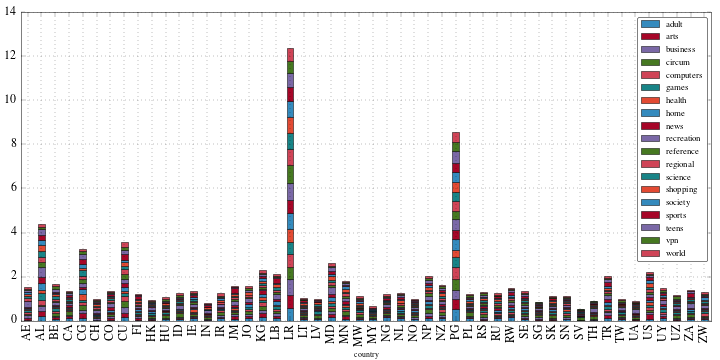

In [84]:
fig1, ax1 = plt.subplots(1,1, figsize=(10,5))
by_subcat_ratio.plot(ax=ax1, kind='bar', stacked=True)
fig1.tight_layout()
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.legend(prop={'size':9})
#format_axes(ax1)
fig1.savefig(PLOTS + "stacked_censorship_by_country_subcat_disjoint_dropna")

In [85]:
from matplotlib.lines import Line2D
import random
unfilled_markers = [m for m, func in Line2D.markers.iteritems()
                    if func != 'nothing' and m not in Line2D.filled_markers]
#unfilled_markers = sorted(unfilled_markers)[::-1]  # Reverse-sort for pretty

<IPython.core.display.Javascript object>


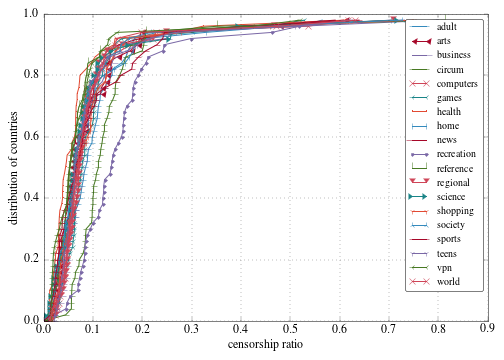

In [88]:
fig1, ax1 = plt.subplots(1,1, figsize=(7,5))

for col in by_subcat_ratio.columns:
    xdata = by_subcat_ratio[col].copy()
    xdata.sort()
    ydata = [float(x) / float(len(xdata)) for x in range(len(xdata))]
    ax1.plot(xdata,ydata, label=col, marker=random.choice(unfilled_markers))
    
fig1.tight_layout()
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.legend(prop={'size':10})
ax1.grid(1)
ax1.set_xlabel("censorship ratio", size=12)
ax1.set_ylabel("distribution of countries", size=12)
fig1.tight_layout()
#format_axes(ax1)
fig1.savefig(PLOTS + "CDF_censorship_by_country_subcat_disjoint_dropna")

## DISJOINT ALL (no valid filter)

In [89]:
by_subcat_total = by_country['total'].unstack().T
by_subcat_unknown = by_country['unknown'].unstack().T
by_subcat_censor = by_country['censor'].unstack().T
by_subcat_ratio = (by_subcat_censor/ (by_subcat_total-by_subcat_unknown) )

<IPython.core.display.Javascript object>


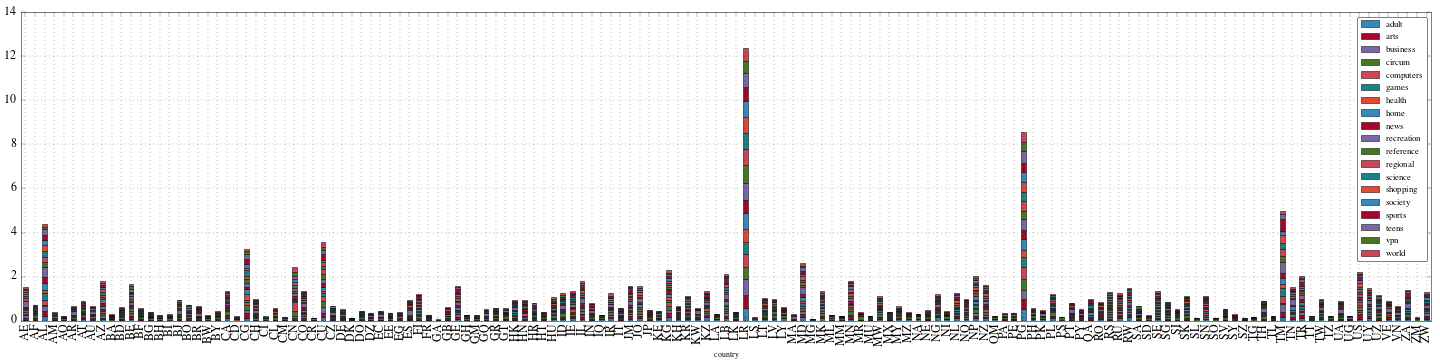

In [90]:
fig1, ax1 = plt.subplots(1,1, figsize=(20,5))
by_subcat_ratio.plot(ax=ax1, kind='bar', stacked=True)
fig1.tight_layout()
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.legend(prop={'size':9})
#format_axes(ax1)
fig1.savefig(PLOTS + "stacked_censorship_by_country_subcat_disjoint_all")

<IPython.core.display.Javascript object>


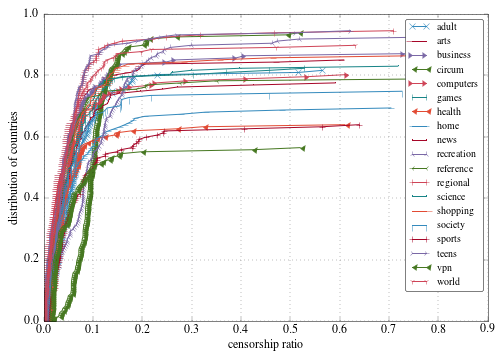

In [92]:
fig1, ax1 = plt.subplots(1,1, figsize=(7,5))

for col in by_subcat_ratio.columns:
    xdata = by_subcat_ratio[col].copy()
    xdata.sort()
    ydata = [float(x) / float(len(xdata)) for x in range(len(xdata))]
    ax1.plot(xdata, ydata, label=col, marker=random.choice(unfilled_markers))
    
fig1.tight_layout()
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.legend(prop={'size':10})
ax1.grid(1)
ax1.set_xlabel("censorship ratio", size=12)
ax1.set_ylabel("distribution of countries", size=12)
#ax1.set_xlim([0,150])
fig1.tight_layout()
#format_axes(ax1)
fig1.savefig(PLOTS + "CDF_censorship_by_country_subcat_disjoint_all")

## UNSHARED ALL (no valid filter)

In [93]:
df = df_final[['sIP', 'country', 'case']].merge(df_sIP_subcat_unshared, on=['sIP'])

by_country = pd.DataFrame( {'censor': df[df['case'].isin([1,3])].groupby(['subcat', 'country'])['domain'].count() } )
by_country['total'] = df.groupby(['subcat', 'country'])['domain'].count()
by_country['unknown'] =  df[df['case'].isin([0,4])].groupby(['subcat', 'country'])['domain'].count()
by_country['known'] = by_country['total'] - by_country['unknown']
by_country['censorship (%known)'] = by_country['censor']/by_country['known']
by_country['unknown (%total)'] = by_country['unknown']/by_country['total']

by_subcat_total = by_country['total'].unstack().T
by_subcat_unknown = by_country['unknown'].unstack().T
by_subcat_censor = by_country['censor'].unstack().T
by_subcat_ratio = (by_subcat_censor/ (by_subcat_total-by_subcat_unknown) )


<IPython.core.display.Javascript object>


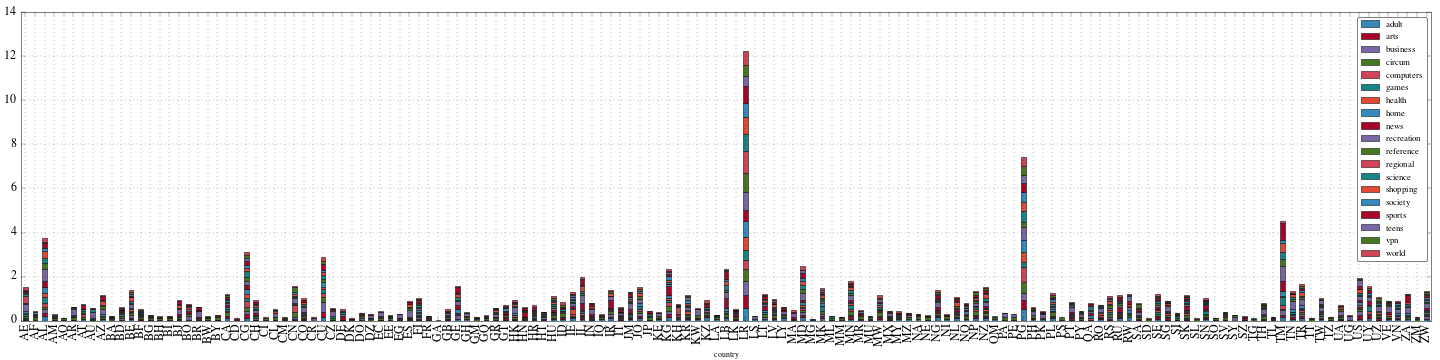

In [94]:

fig1, ax1 = plt.subplots(1,1, figsize=(20,5))
by_subcat_ratio.plot(ax=ax1, kind='bar', stacked=True)
fig1.tight_layout()
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.legend(prop={'size':9})
#format_axes(ax1)
fig1.savefig(PLOTS + "stacked_censorship_by_country_subcat_unshared_all")

<IPython.core.display.Javascript object>


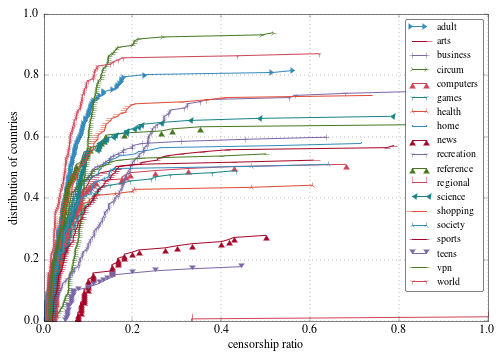

In [95]:
fig1, ax1 = plt.subplots(1,1, figsize=(7,5))

for col in by_subcat_ratio.columns:
    xdata = by_subcat_ratio[col].copy()
    xdata.sort()
    ydata = [float(x) / float(len(xdata)) for x in range(len(xdata))]
    ax1.plot(xdata,ydata, label=col, marker=random.choice(unfilled_markers))
    
fig1.tight_layout()
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.legend(prop={'size':10})
ax1.grid(1)
ax1.set_xlabel("censorship ratio", size=12)
ax1.set_ylabel("distribution of countries", size=12)
fig1.tight_layout()
#format_axes(ax1)
fig1.savefig(PLOTS + "CDF_censorship_by_country_subcat_unshared_all")